# BASICS 03 - HOTS in PyTorch

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ../hots
import tonic, torch, os
from timesurface import timesurface
from network import network
from utils import get_loader

print(f'Tonic version installed -> {tonic.__version__}')

print(f'Number of GPU devices available: {torch.cuda.device_count()}')
for N_gpu in range(torch.cuda.device_count()):
    print(f'GPU {N_gpu+1} named {torch.cuda.get_device_name(N_gpu)}')

/home/antoine/homhots/hotsline/hots
Tonic version installed -> 1.0.15
Number of GPU devices available: 1
GPU 1 named GeForce RTX 2080 Ti


## Loading of the dataset for the clustering phase

In [5]:
trainset = True
transform = tonic.transforms.NumpyAsType(int)
dataset = tonic.datasets.NMNIST(save_to='../../Data/', train=trainset, transform=transform)
loader = get_loader(dataset, kfold = 300, shuffle=True)
#get_dataset_info(dataset, properties = ['time', 'mean_isi', 'nb_events']);
print(f'number of samples in the dataset: {len(loader)}')

number of samples in the dataset: 200


## Initialization of the network

In [4]:
name = 'homeohots'
homeo = True
timestr = '2022-04-05'
dataset_name = 'nmnist'

Rz = (2, 4)
N_neuronz = (8, 16)
tauz = (5e3, 5e4)

network = network(name, dataset_name, timestr, dataset.sensor_size, nb_neurons = N_neuronz, tau = tauz, R = Rz, homeo = homeo)

## Unsupervised clustering

In [5]:
if not os.path.exists('../Records/'):
    os.mkdir('../Records/')
    os.mkdir('../Records/networks/')
filtering_threshold = [2*Rz[L] for L in range(len(Rz))]
path = '../Records/networks/'+network.name+'.pkl'
if not os.path.exists(path):
    network.clustering(loader, dataset.ordering, filtering_threshold, record = True)

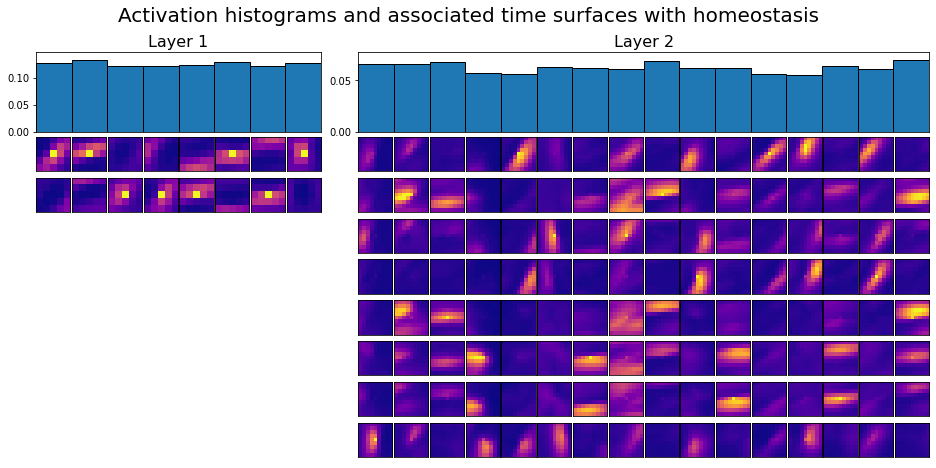

In [6]:
network.plotlayers();

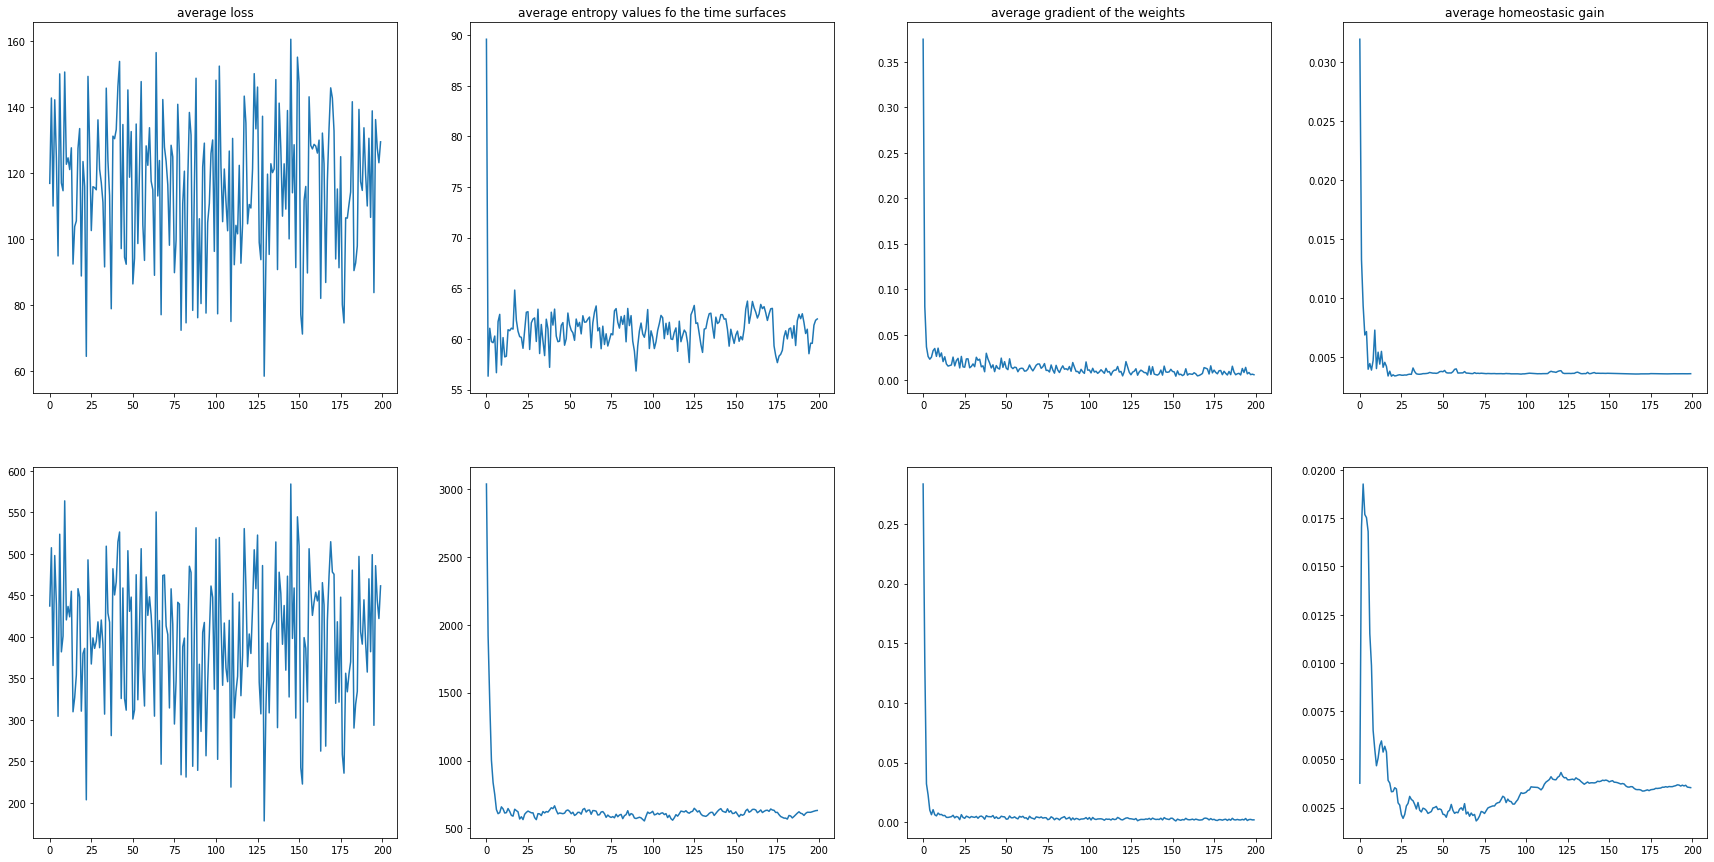

In [7]:
network.plotlearning();

## Coding of the training set

In [8]:
loader = get_loader(dataset, kfold = None, shuffle=True)
network.coding(loader, dataset.ordering, dataset.classes, filtering_threshold, training=trainset)

  0%|                                                                                                                                          | 13/60000 [00:13<16:57:41,  1.02s/it]


KeyboardInterrupt: 

## Coding of the testing set

In [8]:
trainset = False
dataset = tonic.datasets.NMNIST(save_to='../../Data/', train=trainset, transform=transform)
loader = get_loader(dataset, kfold = None, shuffle=True)
network.coding(loader, dataset.ordering, dataset.classes, filtering_threshold, training=trainset)

this dataset have already been processed, check at: 
 ../Records/output/test/2022-04-01_nmnist_homeohots_True_(4, 8, 16)_(5000.0, 50000.0, 500000.0)_(2, 4, 8)_10000_(None, None)/


## TODO: 
- add plotlayer from neuronhots
- add plot of the loss
- add the MLR

In [1]:
990//100

9